In [1]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In this example we will go through clustering: Is a machine learning technique, which groups the unlabelled dataset

https://en.wikipedia.org/wiki/Cluster_analysis

One of the most popular methods is k-means clustering

https://en.wikipedia.org/wiki/K-means_clustering

It aims to partition a set of observations into a number of clusters (k), resulting in the partitioning of the data into Voronoi cells.

K-means clustering uses “centroids”, K different randomly-initiated points in the data, and assigns every data point to the nearest centroid.

Clustering is an un-supervised machine learning algorithm

Our first examoke will be the data from Old Faithfull:

https://en.wikipedia.org/wiki/Old_Faithful

Note:

Azzalini, A. and Bowman, A. W. (1990). A look at some data on the Old Faithful geyser. Applied Statistics, 39, 357–365. doi: 10.2307/2347385, which is available as an R package.

In [2]:
# Our data

import statsmodels.api as sm

geyser = sm.datasets.get_rdataset(dataname='geyser', package='MASS')
geyser.data

,waiting,duration
0,80,4.016667
1,71,2.150000
2,57,4.000000
3,80,4.000000
4,75,4.000000
...,...,...
294,52,4.083333
295,85,2.066667
296,58,4.000000
297,88,4.000000


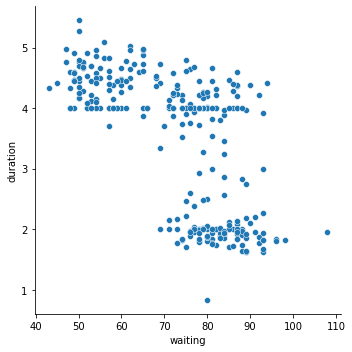

In [3]:
# Plotting our data
sns.relplot(x='waiting', y='duration', data=geyser.data)

Which is the best way to group our data as we see them

The k-means algorithm can be found by imporitng the class Kmeans from scikit-learn

We can choose the n_cluster

Then using fit() 

And the coordinates of the clusters ( cluster_centers_)

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(geyser.data)
kmeans.cluster_centers_

array([[81.31794872,  2.94324786],
       [55.43269231,  4.43125   ]])

In [5]:
# Labels gives us the cluster label
kmeans.labels_[:10]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [6]:
# We can also use fit_predict --> gives us the same output
labels = kmeans.fit_predict(geyser.data)
np.array_equal(labels, kmeans.labels_)

True

Note:

We can also train our model and get the labels using fit_predict()

If we want to get the cluster of other data - other than the training ones - we can use predict()

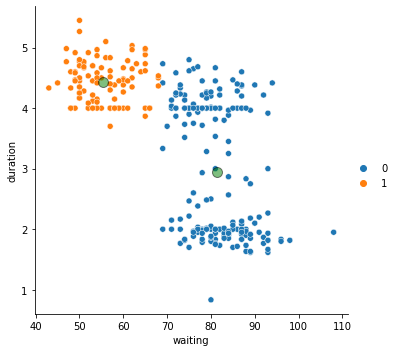

In [7]:
# Displaying the different clusters
sns.relplot(x='waiting', y='duration', hue=kmeans.labels_, data=geyser.data)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='green', edgecolor='black', alpha=0.5, s=100)

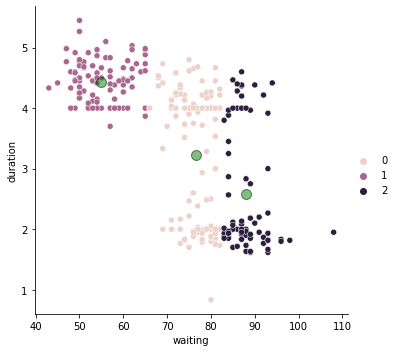

In [8]:
# Increasing the cluster number
kmeans = KMeans(n_clusters=3, random_state=0).fit(geyser.data)
sns.relplot(x='waiting', y='duration', hue=kmeans.labels_, data=geyser.data)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='green', edgecolor='black', s=100, alpha=0.5)

We can see that increasing the number of clusters messes up our data. Not in the fashion that we wanted to.

We understand that the k-means algorithm does not work as well when our data have different variance

In [9]:
geyser.data.describe()

,waiting,duration
count,299.000000,299.000000
mean,72.314381,3.460814
std,13.890324,1.147904
min,43.000000,0.833333
25%,59.000000,2.000000
50%,76.000000,4.000000
75%,83.000000,4.383333
max,108.000000,5.450000


In [10]:
# Hence we need to use StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(geyser.data)
scaled_geyser = pd.DataFrame(X, index=geyser.data.index, 
                             columns=geyser.data.columns)
scaled_geyser

,waiting,duration
0,0.554235,0.485045
1,-0.094784,-1.143834
2,-1.104370,0.470501
3,0.554235,0.470501
4,0.193669,0.470501
...,...,...
294,-1.464936,0.543219
295,0.914801,-1.216552
296,-1.032257,0.470501
297,1.131141,0.470501


<Figure size 432x288 with 0 Axes>

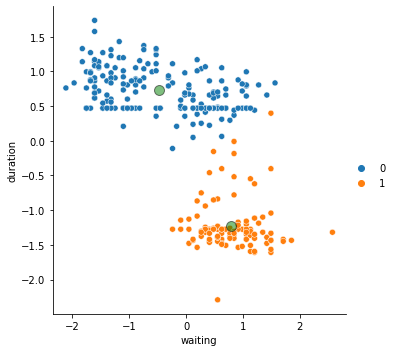

In [11]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(scaled_geyser)
plt.figure()
sns.relplot(x='waiting', y='duration', hue=kmeans.labels_, data=scaled_geyser)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='green', edgecolor='black', s=100, alpha=0.5)

We can see now more resonable results , the clusters are seperated and the centers of each cluster can be found inside them

<Figure size 432x288 with 0 Axes>

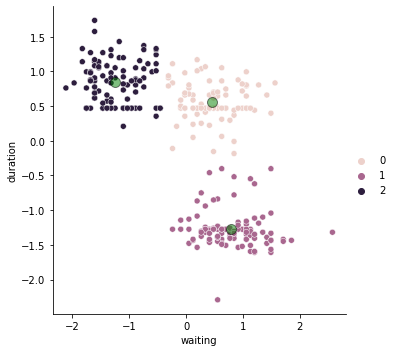

In [12]:
# 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_geyser)
plt.figure()
sns.relplot(x='waiting', y='duration', hue=kmeans.labels_, data=scaled_geyser)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='green', edgecolor='black', s=100, alpha=0.5)

We can see that the above data are much better.

We have delt in the above example with a small number of dimensions and we displayed our data for visualization

But what if we have more data , more dimensions

We can use the elbow method

https://en.wikipedia.org/wiki/Elbow_method_(clustering)
https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

We create diagram with the number of clusters as the x-axis the sum of squares distance for each point from the center cluster ( as the y-axis)

(distortion score)

Hence the diagram created will look something like a bicep , hence the curve will give us the maximun number of clusters

C:\Users\Pelop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


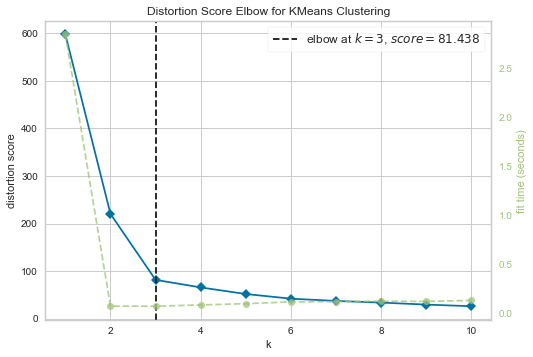

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1,11))

visualizer.fit(scaled_geyser)
visualizer.show()

Another method for calculating the number of clusters

https://en.wikipedia.org/wiki/Silhouette_(clustering)

Mathemtical equation can be found in the above link

More info:

Το s(i) κυμαίνεται από το [−1,1]


Αν το s(i)
είναι κοντά στο +1

, τότε το σημείο απέχει πολύ από τη γείτονα συστάδα (και άρα και τις άλλες).

Αν s(i)=0

, τότε το σημείο βρίσκεται στο σύνορο με τη γείτονα συστάδα.

Αν s(i)<0

, τότε το σημείο μπορεί να βρίσκεται σε λάθος συστάδα.

Αφού έχουμε το s(i)
για κάθε i

, υπολογίζουμε τη μέση μετρική σιλουέτας για όλα τα σημεία.

Επιλέγουμε τον αριθμό των συστάδων που μας δίνει τη μέγιστη μέση μετρική σιλουέτας.


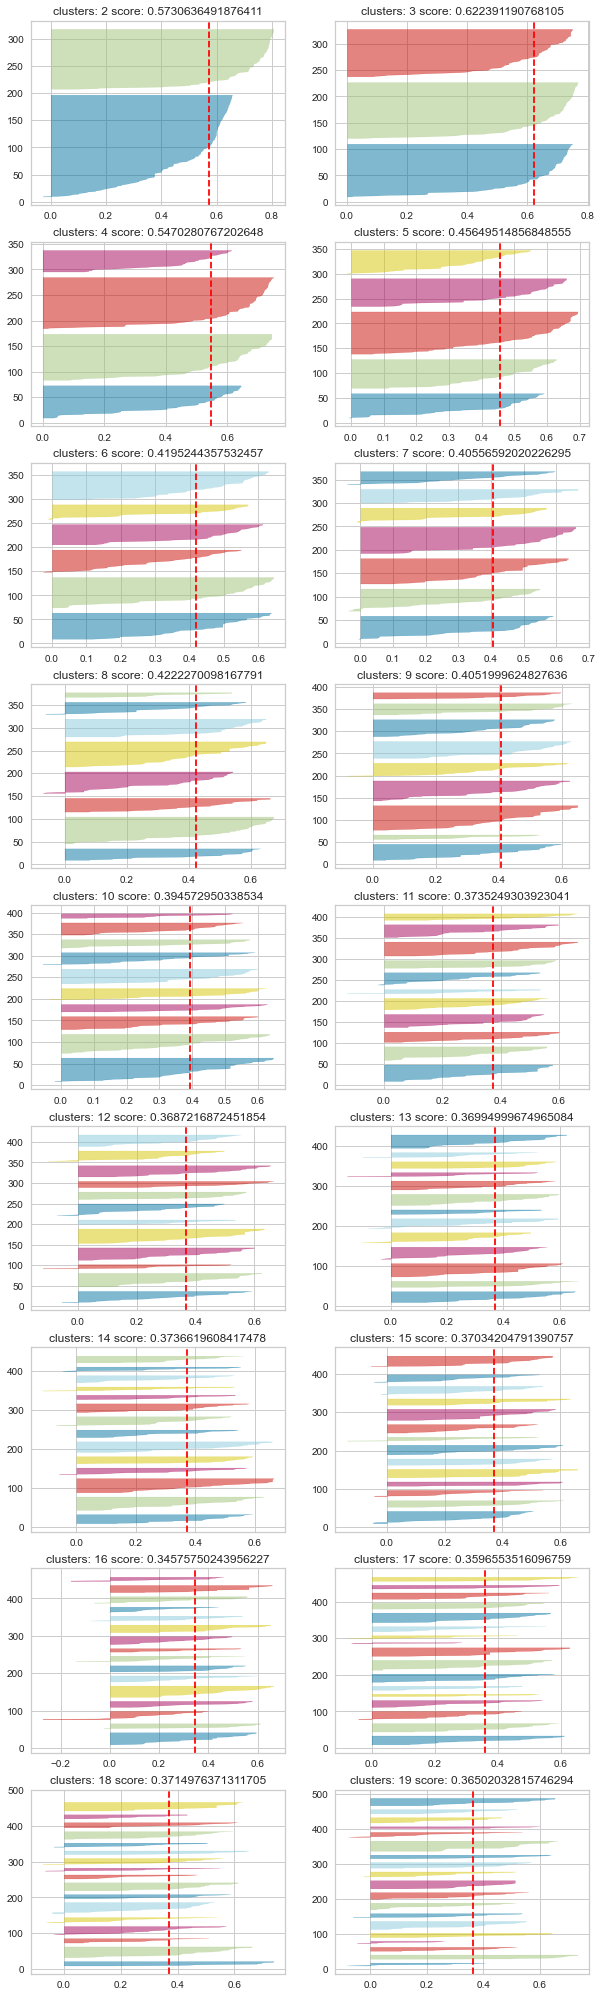

In [14]:
from yellowbrick.cluster import SilhouetteVisualizer

plt.figure(figsize=(2 * 5,  10 * 4))

scores = {}
for n_clusters in range(2, 20):
    plt.subplot(10, 2, n_clusters - 1)
    kmeans = KMeans(n_clusters, random_state=42)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(scaled_geyser)
    scores[n_clusters] = visualizer.silhouette_score_
    plt.title(f'clusters: {n_clusters} score: {visualizer.silhouette_score_}')

In [15]:
# We can now sort the clusters

sorted(scores.items(), key=lambda kv: kv[1], reverse=True)

[(3, 0.622391190768105),
 (2, 0.5730636491876411),
 (4, 0.5470280767202648),
 (5, 0.45649514856848555),
 (8, 0.4222270098167791),
 (6, 0.4195244357532457),
 (7, 0.40556592020226295),
 (9, 0.4051999624827636),
 (10, 0.394572950338534),
 (14, 0.3736619608417478),
 (11, 0.3735249303923041),
 (18, 0.3714976371311705),
 (15, 0.37034204791390757),
 (13, 0.36994999674965084),
 (12, 0.3687216872451854),
 (19, 0.36502032815746294),
 (17, 0.3596553516096759),
 (16, 0.34575750243956227)]

Hence both methods have found the same number ( n_clusters = 3)

Reminder:

What do those clusters really means? This is for us to figure out the algorithm just seperates our data and makes our life easier